In [626]:
#Date: 200619

# Mining Classification

## Introduction

- **Data:** 
    - From Kaggle for the International Mineralogical Association Database of Mineral Properties
    - https://www.kaggle.com/lsind18/ima-database-of-mineral-properties
    


- **Goal:** Classification model, which country has the most abundant minerals?

## Imports

In [430]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## Data Cleaning

In [431]:
#access IMG data file
df=pd.read_csv(r'/Users/karenpaklin/Documents/generalassembly/project/RRUFF_Export_20191025_022204.csv')
#turn this into a relative file path

In [432]:
df.head(2)

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Oldest Known Age (Ma)
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014.0,Approved,,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,370.0
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975.0,Approved,,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,56.0


### Headers Explained

- __Mineral Name:__ In general terms, a mineral is an element or chemical compound that is normally crystalline and which has been formed as a result of geological processes. There are some exceptions like mercury which occurs naturally as a liquid at normal temperatures, but IMA's new definition now accepts extraterrestial substances as minerals, whilst previously recognised species from Laurium in Greece are discredited because they are formed from the weathering of slag. Source (http://www.mineral.org.au/news/namingmins.htmlz)
- __RRUFF Chemistry (plain):__ RRUFF formula (named for Raman Spectroscopy), which stores the chemistry in electron forms
- __IMA Chemistry (plain):__  The International Mineralogical Association(IMA) formula
- __Chemistry Elements:__ The mineral broken down into element composition
- __IMA number:__ The mineral reference number as stored in the IMA database
- __RRUFF IDs:__ The mineral reference number as stored in the RRUFF database
- __Country of Type Locality:__ The locality where the original material came from for the formal definition of the mineral species
- __Year First Published:__ The year a paper was first published about it
- __IMA Status:__ The IMA status of a mineral (Approved or Discredited)
- __Structural Groupname:__ A mineral group, which are comprised of a number of mineral species with similar chemical and crystallographic characteristics
- __Fleishers Groupname:__ Fleisher first addressed the criteria for accepting new minerals, and he did this for 40 years, first by himself, and later with peers and associates. His later experience, contributions, and professional development led to him writing The Glossary of Mineral Species in 1971 which was a reference book that included mineral species, their formulas, and lattice structures. It has since been re-released in updated versions every couple of years. Source (https://en.wikipedia.org/wiki/Michael_Fleischer_(mineralogist))
- __Status Notes:__ References affiliated published papers
- __Crystal Systems:__ Classifies the crystallography into 7 groups based on their point groups and lattice system assignment
- __Oldest Known Age (Ma):__ Years in Mega-annum (1 million years)



In [433]:
#make the headers easier fields to use and manipulate
df.rename(columns={'Mineral Name':'Mineral',
                   'Chemistry Elements':'Elements',
                   'Country of Type Locality':'Country',
                   'IMA Status':'ima_status',
                   'Structural Groupname':'structural_group',
                   'Fleischers Groupname':'fleischers_group',
                   'Crystal Systems':'crystal_systems', 
                   'Oldest Known Age (Ma)':'Age_Ma'
                  }, inplace=True)

In [434]:
df.head()

,Mineral,RRUFF Chemistry (plain),IMA Chemistry (plain),Elements,IMA Number,RRUFF IDs,Country,Year First Published,ima_status,structural_group,fleischers_group,Status Notes,crystal_systems,Age_Ma
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014.0,Approved,,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,370.0
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975.0,Approved,,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,56.0
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(P5+O4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991.0,Approved,,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,124.0
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,NaN,NaN,USA,1956.0,Grandfathered|Approved,Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,358.9
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983.0,Approved,,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,0.0


### Removing Nulls

In [435]:
#fill in the missing values
df.isnull().sum()

Mineral                       0
RRUFF Chemistry (plain)       0
IMA Chemistry (plain)         4
Elements                      4
IMA Number                 2104
RRUFF IDs                  3499
Country                     199
Year First Published        202
ima_status                  122
structural_group              0
fleischers_group              0
Status Notes                 68
crystal_systems             502
Age_Ma                      947
dtype: int64

Minerals have no missing values
Country has 199 missing values, so fix this

In [436]:
df['Country']=df.Country.fillna(value='unknown')
df.isnull().sum()

Mineral                       0
RRUFF Chemistry (plain)       0
IMA Chemistry (plain)         4
Elements                      4
IMA Number                 2104
RRUFF IDs                  3499
Country                       0
Year First Published        202
ima_status                  122
structural_group              0
fleischers_group              0
Status Notes                 68
crystal_systems             502
Age_Ma                      947
dtype: int64

In [437]:
#There are ?, /, (), Moon
df['Country'].value_counts()

USA                                                                             812
Russia                                                                          790
Italy                                                                           355
Germany                                                                         346
unknown                                                                         268
Canada                                                                          228
Sweden                                                                          185
Australia                                                                       160
Japan                                                                           147
Chile                                                                           137
China                                                                           129
United Kingdom                                                              

In [438]:
#dfsmall=pd.DataFrame(df, columns = ['Mineral', 'Country'])
#dfsmall

In [439]:

minerals=dfsmall['Country'].str.split(" / ", n=3, expand=True)
#minerals.tail(40)
#print(minerals[3].value_counts())
#dfsmall['CountryFirst']=minerals[0]
#dfsmall['CountrySecond']=minerals[1]
#dfsmall['CountryThird']=minerals[2]
#dfsmall['CountryFourth']=minerals[3]
#df['Country']=df['Country'].str.split("/", n=1, expand=True)
#dfsmall['CountryFirst'].value_counts()
#minerals.tail(40)
#minerals
#newdf = minerals.append(dfsmall)
#newdf

In [440]:
countr = df.set_index('Mineral').Country.str.split(' / ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
#countr = df.set_index('Mineral').Country.str.split('/', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
countr.columns = ['Mineral', 'Country']
#countr['Country'].str.strip()
#countr['Country'].value_counts()
#countr.drop(countr[countr.Country == 'unknown'].index, inplace=True)

In [441]:
countr['Country'].str.strip()
countr.Country.replace('?','unknown', inplace=True)
countr.loc[countr['Country'].str.contains(' \?', case=False), 'Country'] = 'unknown'
#countr.loc[countr['Country'].str.contains(' ', case=False), 'Country'] = 'unknown'
countr.loc[countr['Country'].str.contains('meteorite', case=False), 'Country'] = 'meteorite'
countr.loc[countr['Country'].str.contains('IDP', case=False), 'Country'] = 'USA' #IDP is planatary dust that landed over the USA
#countr[countr['Country']=='?'].Country.value_counts()
#countr['Country'].value_counts()[0:20]
#print(countr[countr['Country'].str.contains('meteorite', regex=False)])
#countr.Country.str.replace(r'(^.*(meteorite).*$)', 'meteorite')
#countr['Country'].value_counts()[0:20]
print(countr[countr['Country']=='USA (meteorite)'].Country.value_counts())
print(countr[countr['Country']=='meteorite'].Country.value_counts())
print(countr[countr['Country']=='New Zealand ?'].Country.value_counts()) #drop this....
print(countr[countr['Country']=='IDP'].Country.value_counts())
print(countr[countr['Country']==''].Country.value_counts())

Series([], Name: Country, dtype: int64)
meteorite    101
Name: Country, dtype: int64
Series([], Name: Country, dtype: int64)
Series([], Name: Country, dtype: int64)
Series([], Name: Country, dtype: int64)


In [442]:
countr['Country'].value_counts()
#I still have some data integrity issues, not all my countries split correctly, but I can always come back and refine it


USA                                 825
Russia                              802
Italy                               369
Germany                             364
unknown                             288
Canada                              233
Sweden                              185
Australia                           162
Japan                               148
Chile                               137
Czech Republic                      133
China                               129
United Kingdom                      126
France                              123
Namibia                             107
meteorite                           101
Democratic Republic of the Congo     99
Switzerland                          91
Norway                               85
Denmark (Greenland)                  81
South Africa                         78
Kazakhstan                           78
Brazil                               74
Mexico                               72
Tajikistan                           58


In [443]:
#cleaning before plotting
countr.drop(countr[countr.Country == 'unknown'].index, inplace=True) #change blanks to unknown country values

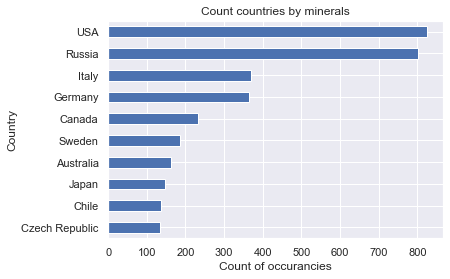

In [444]:
countr['Country'].value_counts()[0:10].sort_values().plot(kind='barh')
plt.xlabel("Count of occurancies")
plt.ylabel("Country")
plt.title("Count countries by minerals");

In [445]:
#type(countr)
countr.shape

(5538, 2)

In [446]:
#countr[countr['Country']=='?'].Country.value_counts()
#countr[countr['Country']=='USA (meteorite)'].Country.value_counts()
#countr.groupby('Country').describe()
#there's further ways to refine the data, like Moon is listed as a country, and the meteorites are listed as a
#seperate country- but I'll stick to the goal/scope of the model for now and refine this later
countr.groupby('Country').Country.count().shape
#countr.head(5547)

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(countr[1])
#countr

(127,)

From refining the data set, we can see the following

- There are 127 rows/ countries listed (bear with me)
- There are 5538 minerals listed that we've refined

The quantity of minerals listed are about the same for the USA and Russia, which makes sense since Fleisher dedicated most of his life translating these documents and affiliated mineralogical content.

## Classification Models

### KNN Classification

In [505]:
countr['isUSA']=countr.Country.map({'USA':1, 'Russia':2, 'Italy':3}) #sticking to binary classification
countr['isUSA'].fillna(0, inplace = True) 
countr.head(10)

,Mineral,Country,isUSA
0,Abellaite,Spain,0.0
1,Abelsonite,USA,1.0
2,Abenakiite-(Ce),Canada,0.0
3,Abernathyite,USA,1.0
4,Abhurite,Saudi Arabia,0.0
5,Abramovite,Russia,2.0
6,Abswurmbachite,Greece,0.0
7,Abuite,Japan,0.0
8,Acanthite,Czech Republic,0.0
9,Acetamide,Ukraine,0.0


In [575]:
#Parameters - dedicate the testing portions 50/50
portion = countr[:2250] #for the training set
portion_test = countr[2250:] #for the testing set 

#set X and Y- create it based on a portion of the data set
#create a response vector
y=portion.Country
#make the features
# create feature matrix (X)
feature_cols = ['isUSA']
X = portion[feature_cols]
portion.shape

(2250, 3)

In [519]:
#Importing Classification model
from sklearn.neighbors import KNeighborsClassifier
# instantiate KNeighborsClassifier - default is K=5, come back around to change this
knn=KNeighborsClassifier(n_neighbors=100)
#fit the model with data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [520]:
#Make a prediction on the probability of which country the mineral is from 
knn.predict(X)

array(['Germany', 'USA', 'Germany', ..., 'Russia', 'Russia', 'USA'],
      dtype=object)

In [521]:
# calculate predicted probabilities
knn.predict_proba(X)

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.06],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.06],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [525]:
predictions = knn.predict(X)

In [526]:
# compute classification accuracy - because we didn't use test/train split and used the train data to make the outcome
print(metrics.accuracy_score(y, predictions))

0.43066666666666664


In [527]:
#Look to the accuracy score
X_test = portion_test[feature_cols]
y_test = portion_test.Country
predictions = knn.predict(X_test)
predictions

array(['Germany', 'Germany', 'USA', ..., 'Russia', 'Germany', 'Germany'],
      dtype=object)

In [528]:

metrics.accuracy_score(y_test, predictions)

0.4230535279805353

- This is horrible
- This time, we'll use the whole data set, and the train test split function

In [591]:
#create a response vector
y=countr.Country
#make the features
# create feature matrix (X)
feature_cols = ['isUSA']
X = countr[feature_cols]

In [605]:
#let's use test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  #if random_state=42, accuracy is 45 -not used, is 42
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.4505415162454874

It's not much better

In [606]:
y_test.value_counts()

Russia                              214
USA                                 207
Germany                             102
Italy                               101
Canada                               55
Sweden                               45
Japan                                42
United Kingdom                       39
Australia                            34
China                                31
France                               31
Czech Republic                       29
Chile                                28
Namibia                              24
meteorite                            22
South Africa                         21
Switzerland                          21
Norway                               20
Mexico                               19
Democratic Republic of the Congo     19
Kazakhstan                           19
Denmark (Greenland)                  19
Austria                              16
Argentina                            14
Bolivia                              14


In [607]:
# compute null accuracy
y_test.value_counts().head(1) / len(y_test)

Russia    0.154513
Name: Country, dtype: float64

Text(0, 0.5, 'Accuracy (higher is better)')

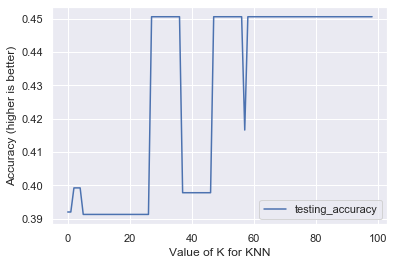

In [608]:
#looking for the best K value
k_range = range(1, 100)
testing_accuracy = []

for k in k_range:
    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit to build the model
    knn.fit(X_train, y_train)
    # store predictions
    predictions = knn.predict(X_test)
    # calculate the accuracy score for the model
    accuracy_score = metrics.accuracy_score(y_test, predictions)
    # store the accuracy of the model
    testing_accuracy.append(accuracy_score)
    
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'testing_accuracy':testing_accuracy}
portion
df = pd.DataFrame(column_dict)
df.head()

# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df.plot(y='testing_accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy (higher is better)')

- So we can conclude a KNN value of ~100 will give us accuracy about 40% of the time on being able to predict if a mineral is from the USA
- The data is more reproducible when using a random state as well


Now, we can look to cross validation, which helps us by building multiple train test splits

In [609]:
from sklearn.model_selection import cross_val_score

# fit the knn model multiple times using cross validation
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('The cross_val scores are: {}'.format(scores), '\n')
print('The mean of the cross_val scores is: {}'.format(scores.mean()))

/Users/karenpaklin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


The cross_val scores are: [0.42779783 0.42599278 0.42238267 0.42418773 0.42418773 0.42418773
 0.42599278 0.42960289 0.42857143 0.42857143] 

The mean of the cross_val scores is: 0.42614749871067553


Text(0, 0.5, 'Error (lower is better)')

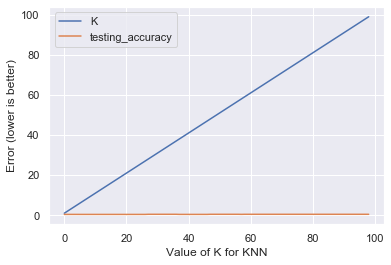

In [610]:
#we can analyze error as well
# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

In [620]:
# recall
#print("Recall Score : ",recall_score(y_test, predictions)
metrics.recall_score(y_test, predictions, average='weighted')

0.4505415162454874

In [621]:
# precision
metrics.precision_score(y_test, predictions, average='weighted')

0.3855997255815705

In [622]:
# f1 score
metrics.f1_score(y_test, predictions, average='weighted')

0.3924640392061503

In [623]:
# confusion matrix
metrics.confusion_matrix(y_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [624]:
# extract confusion matrix results
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print('TN:{} | FP:{} | FN:{} | TP:{}'.format(tn, fp, fn, tp))

ValueError: too many values to unpack (expected 4)

In [625]:
# classification report
print(metrics.classification_report(y_test, predictions))

                                  precision    recall  f1-score   support

                     Afghanistan       0.00      0.00      0.00         1
                         Algeria       0.00      0.00      0.00         4
                      Antarctica       0.00      0.00      0.00         4
                       Argentina       0.00      0.00      0.00        14
                         Armenia       0.00      0.00      0.00         1
                       Australia       0.00      0.00      0.00        34
                         Austria       0.00      0.00      0.00        16
                      Azerbaijan       0.00      0.00      0.00         1
                         Belarus       0.00      0.00      0.00         1
                         Belgium       0.00      0.00      0.00         7
                         Bolivia       0.00      0.00      0.00        14
                        Botswana       0.00      0.00      0.00         1
                          Brazil     

/Users/karenpaklin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

In [469]:
#remove discredited minerals

## Sources of Reference

In [ ]:
https://machinelearningmastery.com/types-of-classification-in-machine-learning/
https://www.youtube.com/watch?v=irHhDMbw3xo
https://en.wikipedia.org/wiki/42_(number)#Popular_culture